In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [ ]:

# Preprocess the data
img_rows, img_cols = 28, 28
num_classes = 10

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [ ]:

# Define the model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])


In [ ]:

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:

# Train the model
batch_size = 128
epochs = 10

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 67s 140ms/step - loss: 0.7079 - accuracy: 0.7409 - val_loss: 0.4574 - val_accuracy: 0.8306
Epoch 2/10
469/469 [==============================] - 65s 138ms/step - loss: 0.4761 - accuracy: 0.8280 - val_loss: 0.3771 - val_accuracy: 0.8642
Epoch 3/10
469/469 [==============================] - 65s 138ms/step - loss: 0.4178 - accuracy: 0.8493 - val_loss: 0.3456 - val_accuracy: 0.8747
Epoch 4/10
469/469 [==============================] - 66s 142ms/step - loss: 0.3846 - accuracy: 0.8608 - val_loss: 0.3211 - val_accuracy: 0.8819
Epoch 5/10
469/469 [==============================] - 66s 141ms/step - loss: 0.3581 - accuracy: 0.8717 - val_loss: 0.3127 - val_accuracy: 0.8847
Epoch 6/10
469/469 [==============================] - 64s 137ms/step - loss: 0.3379 - accuracy: 0.8774 - val_loss: 0.2966 - val_accuracy: 0.8906
Epoch 7/10
469/469 [==============================] - 64s 136ms/step - loss: 0.3245 - accuracy: 0.8823 - val_loss: 0.2819 - val_ac

In [ ]:

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.27393627166748047
Test accuracy: 0.8966000080108643


313/313 [==============================] - 3s 9ms/step


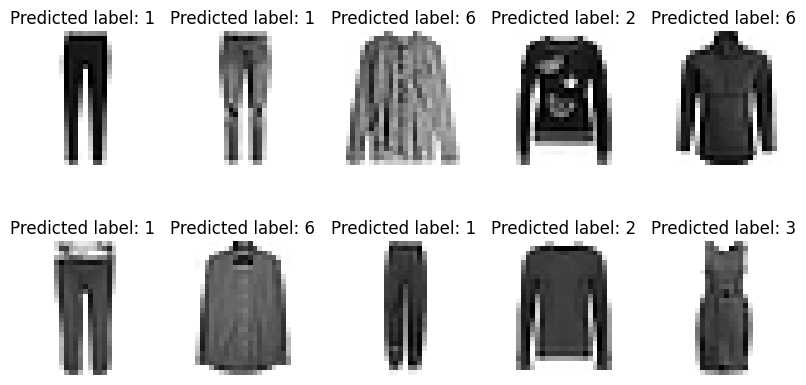

In [ ]:
# Make predictions
predictions = model.predict(x_test)

# Convert predictions to labels
labels = np.argmax(predictions, axis=1)

# Display some random test images with their predicted labels
num_images = 10
random_indices = np.random.choice(x_test.shape[0], num_images, replace=False)

# Increase size of figure
plt.figure(figsize=(10, 5))

for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[random_indices[i]].reshape(28, 28), cmap=plt.cm.gray_r)
    plt.title(f"Predicted label: {labels[random_indices[i]]}")
    plt.axis('off')
plt.show()